<a href="https://colab.research.google.com/github/sakarla/AI-in-the-Built-Environment/blob/main/week%204_5_Data%20Visualization/Notebook%20code/data_processing_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text pre-processing and visulization:**
In this section, we will implement several preprocessing techniques on the text data collected previously. The objective of this part is to familiarize you with essential steps that enhance data clarity, ensuring it is well-prepared for the machine learning process.


*    Learn text preprocessing
*    Visualization
  *   bar chart
  *   Cloud of words





Let's get started!

# **1. Text preprocessing**

To start, we will link this notebook to your Google Drive. Make sure you are logged in on your Google account

In [42]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 1.1: Import Libraries**

Make sure to install any libraries that are not already installed by using `!pip install library_name`.

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer


**Step 1.2: Load text File**

Assuming you have a JSON file called **combined_data.json**, you can read it as follows:

In [23]:
import json

# Load JSON Data
json_file = '/content/drive/MyDrive/ai class data/text/combined_data.json'  # Replace with the path to your JSON file
with open(json_file, 'r', encoding='utf-8') as file:
    data = json.load(file)

**Step 1.3: Extract and Preprocess Text Data**

We will extract the text content from the JSON file and preprocess it.

In [24]:
# Initialize an empty list to store text content
text_data = []
#  Extract "content" from JSON
for item in data:
    if 'content' in item:
        text_content = item['content']

        # Join the list of content elements into a single string
        text_content = ' '.join(text_content)
        text_data.append(text_content)


Now, **text_data** contains a list of sentences from your text file.

 Before preprocessing, it's essential to understand your data. You can do this by checking the first few rows of your Data and getting some basic statistics.

In [25]:
# Display the first few sentences
print(text_data[:1])  # Replace 5 with the number of sentences you want to display

# Get basic statistics of the text data
print("Number of text:", len(text_data))


['\nProjects\n \nImages\n \nProducts\n \nFolders\n \nFeed\n  This project aims to explore "home" not only as a type of architecture but also as a part of our daily life and identity, which goes beyond any physical location and reflects our relationship with ourselves, others, and the surrounding universe. The concept of "home" in Iran and the world has undergone significant changes over the past few decades, but it can be said that in Iran, the turning point of these changes was in the 1950s. At that time, due to the increase in urban population on the one hand and the increase in oil income and wrong policies of governments on the other hand, "home" turned into a profitable commodity for capital production. This trend became more bureaucratic by the government in the 1970s, and "home" and housing became the most important investment field in Iran. However, for us in the process of designing "House Number 10 Jolfa", there is an opportunity to search for a deeper contemporary meaning of

**Step 1.4: Text Cleaning**

Text data often contains noise that needs to be cleaned. Here are some common text cleaning steps:


**Lowercasing**: Convert all text to lowercase to ensure consistency.

In [26]:
len(text_data)

2

In [27]:
text_data = [sentence.lower() for sentence in text_data]
print(text_data)

['\nprojects\n \nimages\n \nproducts\n \nfolders\n \nfeed\n  this project aims to explore "home" not only as a type of architecture but also as a part of our daily life and identity, which goes beyond any physical location and reflects our relationship with ourselves, others, and the surrounding universe. the concept of "home" in iran and the world has undergone significant changes over the past few decades, but it can be said that in iran, the turning point of these changes was in the 1950s. at that time, due to the increase in urban population on the one hand and the increase in oil income and wrong policies of governments on the other hand, "home" turned into a profitable commodity for capital production. this trend became more bureaucratic by the government in the 1970s, and "home" and housing became the most important investment field in iran. however, for us in the process of designing "house number 10 jolfa", there is an opportunity to search for a deeper contemporary meaning of

**Removing Special Characters and Numbers:** Remove punctuation, special characters, and numbers using regular expressions.

`sentence.replace('\n', ' ')`: Within each sentence, this part of the code uses the replace method to replace all occurrences of the newline character ('\n') with nothing('').

`r'[^a-zA-Z\s]':` This regular expression pattern matches any character that is not an uppercase or lowercase alphabet letter (a-zA-Z) and not a whitespace character (\s).

In [28]:
text_data = [re.sub(r'[^a-zA-Z\s]', '', sentence.replace('\n', '')) for sentence in text_data]

print(text_data)

['projects images products folders feed  this project aims to explore home not only as a type of architecture but also as a part of our daily life and identity which goes beyond any physical location and reflects our relationship with ourselves others and the surrounding universe the concept of home in iran and the world has undergone significant changes over the past few decades but it can be said that in iran the turning point of these changes was in the s at that time due to the increase in urban population on the one hand and the increase in oil income and wrong policies of governments on the other hand home turned into a profitable commodity for capital production this trend became more bureaucratic by the government in the s and home and housing became the most important investment field in iran however for us in the process of designing house number  jolfa there is an opportunity to search for a deeper contemporary meaning of home therefore this project seeks to interact effecti

**Tokenization:** Split text into individual words or tokens.

In [29]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
text_data = [nltk.word_tokenize(sentence) for sentence in text_data]
print(text_data)

[['projects', 'images', 'products', 'folders', 'feed', 'this', 'project', 'aims', 'to', 'explore', 'home', 'not', 'only', 'as', 'a', 'type', 'of', 'architecture', 'but', 'also', 'as', 'a', 'part', 'of', 'our', 'daily', 'life', 'and', 'identity', 'which', 'goes', 'beyond', 'any', 'physical', 'location', 'and', 'reflects', 'our', 'relationship', 'with', 'ourselves', 'others', 'and', 'the', 'surrounding', 'universe', 'the', 'concept', 'of', 'home', 'in', 'iran', 'and', 'the', 'world', 'has', 'undergone', 'significant', 'changes', 'over', 'the', 'past', 'few', 'decades', 'but', 'it', 'can', 'be', 'said', 'that', 'in', 'iran', 'the', 'turning', 'point', 'of', 'these', 'changes', 'was', 'in', 'the', 's', 'at', 'that', 'time', 'due', 'to', 'the', 'increase', 'in', 'urban', 'population', 'on', 'the', 'one', 'hand', 'and', 'the', 'increase', 'in', 'oil', 'income', 'and', 'wrong', 'policies', 'of', 'governments', 'on', 'the', 'other', 'hand', 'home', 'turned', 'into', 'a', 'profitable', 'commodi

**Stopword Removal:** Remove common stopwords (e.g., "the", "and", "is") to reduce noise.

In [31]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
text_data = [[word for word in sentence if word not in stop_words] for sentence in text_data]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
print(text_data)

[['projects', 'images', 'products', 'folders', 'feed', 'project', 'aims', 'explore', 'home', 'type', 'architecture', 'also', 'part', 'daily', 'life', 'identity', 'goes', 'beyond', 'physical', 'location', 'reflects', 'relationship', 'others', 'surrounding', 'universe', 'concept', 'home', 'iran', 'world', 'undergone', 'significant', 'changes', 'past', 'decades', 'said', 'iran', 'turning', 'point', 'changes', 'time', 'due', 'increase', 'urban', 'population', 'one', 'hand', 'increase', 'oil', 'income', 'wrong', 'policies', 'governments', 'hand', 'home', 'turned', 'profitable', 'commodity', 'capital', 'production', 'trend', 'became', 'bureaucratic', 'government', 'home', 'housing', 'became', 'important', 'investment', 'field', 'iran', 'however', 'us', 'process', 'designing', 'house', 'number', 'jolfa', 'opportunity', 'search', 'deeper', 'contemporary', 'meaning', 'home', 'therefore', 'project', 'seeks', 'interact', 'effectively', 'context', 'become', 'safe', 'peaceful', 'place', 'restore', 

# **2. Visualization**:
We want to visualize the frequency of words step by step. you can create a bar chart to display the word frequencies.

# **2.1 bar chart**

**Step 2.1:Import Libraries**

Import the necessary libraries:

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter




**Step 2.2**: Count Word Frequencies

Count the frequency of each word in the preprocessed text data:



In [34]:
# Combine all preprocessed sentences into a single list of words
all_words = [word for sentence in text_data for word in sentence]

# Count word frequencies
word_freq = Counter(all_words)


In [35]:
word_freq

Counter({'projects': 2,
         'images': 2,
         'products': 2,
         'folders': 2,
         'feed': 2,
         'project': 2,
         'aims': 1,
         'explore': 1,
         'home': 10,
         'type': 1,
         'architecture': 2,
         'also': 2,
         'part': 1,
         'daily': 3,
         'life': 3,
         'identity': 1,
         'goes': 1,
         'beyond': 3,
         'physical': 2,
         'location': 2,
         'reflects': 1,
         'relationship': 2,
         'others': 1,
         'surrounding': 2,
         'universe': 1,
         'concept': 3,
         'iran': 3,
         'world': 1,
         'undergone': 1,
         'significant': 2,
         'changes': 3,
         'past': 1,
         'decades': 2,
         'said': 1,
         'turning': 2,
         'point': 1,
         'time': 2,
         'due': 2,
         'increase': 2,
         'urban': 1,
         'population': 2,
         'one': 4,
         'hand': 3,
         'oil': 1,
         'income':

**Step 2.3**: Visualize Word Frequencies

Visualize the word frequencies using a bar chart:

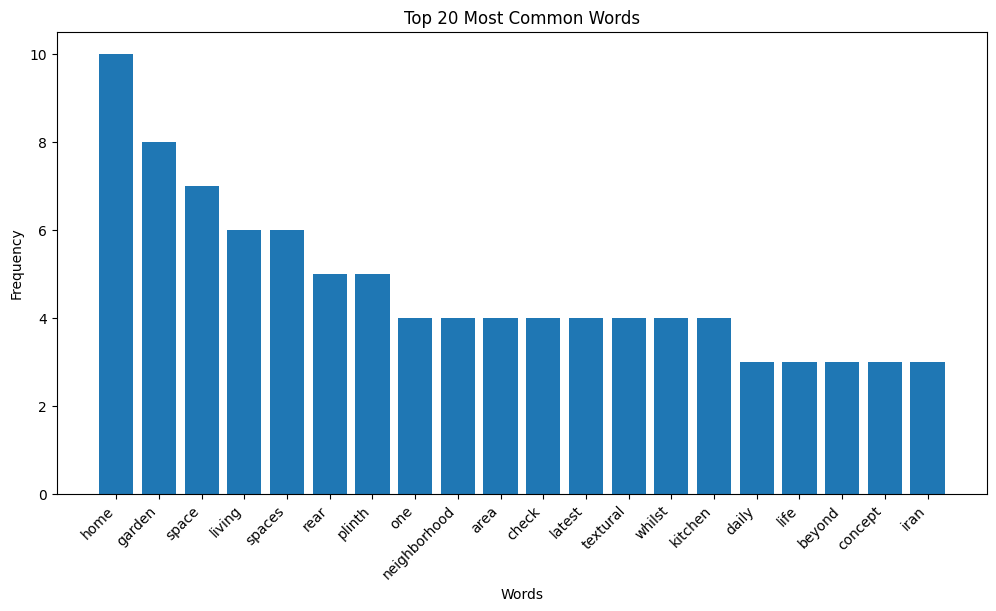

In [36]:
# Get the top N most common words
N = 20  # Change this value to display more or fewer words
most_common_words = word_freq.most_common(N)

# Extract the words and their frequencies
words, frequencies = zip(*most_common_words)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.title(f"Top {N} Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()


This code will count the frequencies of words in the preprocessed text data and create a bar chart to visualize the top N most common words. You can adjust the value of N to display more or fewer words in the chart.

# **2.2 Create Cloud words:**

**Step 1:** Import Libraries

Import the necessary libraries:

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


**Step 2:** Combine Preprocessed Text

Combine all the preprocessed sentences into a single text:

In [38]:
combined_text = " ".join([" ".join(sentence) for sentence in text_data])
print(combined_text)

projects images products folders feed project aims explore home type architecture also part daily life identity goes beyond physical location reflects relationship others surrounding universe concept home iran world undergone significant changes past decades said iran turning point changes time due increase urban population one hand increase oil income wrong policies governments hand home turned profitable commodity capital production trend became bureaucratic government home housing became important investment field iran however us process designing house number jolfa opportunity search deeper contemporary meaning home therefore project seeks interact effectively context become safe peaceful place restore lost tranquility residents question whether retrieving contemporary meaning home response current conditions provide better living resilient space humans today difficult geography facing challenges located jolfa neighborhood next vank cathedral place designated order shah abbas safav

**Step 3:** Generate the Word Cloud

Generate the word cloud from the combined text:

In [39]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)


**Step 4:** Display the Word Cloud

Display the word cloud using matplotlib:

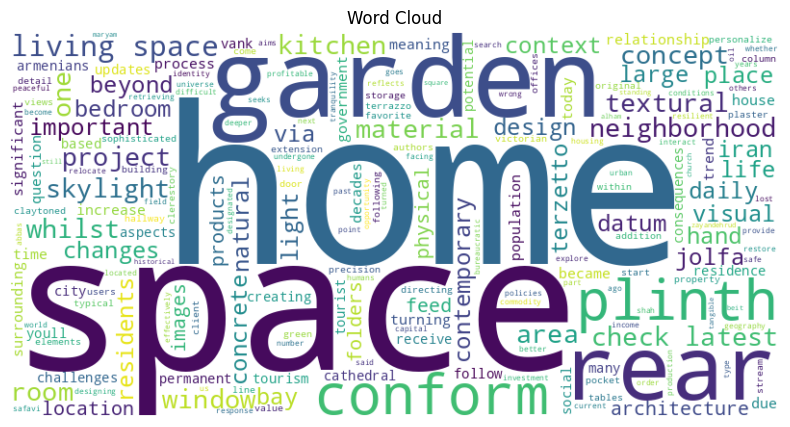

In [40]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud")
plt.show()
